In [1]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
devices = tf.config.list_physical_devices()
print("\nDevices: ", devices)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  details = tf.config.experimental.get_device_details(gpus[0])
  print("GPU details: ", details)


Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU details:  {'device_name': 'METAL'}


In [2]:
# Fundamental classes
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

#Performance Plot
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join('TSR_Data/Train',str(i))
    images = os.listdir(path)

    for j in images:
        try:
            image = Image.open(path + '/'+ j)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [4]:
class_labels = {
    0: "Speed limit (20km/h)",
    1: "Speed limit (30km/h)",
    2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)",
    4: "Speed limit (70km/h)",
    5: "Speed limit (80km/h)",
    6: "End of speed limit (80km/h)",
    7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)",
    9: "No passing",
    10: "No passing for vehicles over 3.5 metric tons",
    11: "Right-of-way at the next intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Vehicles over 3.5 metric tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve to the left",
    20: "Dangerous curve to the right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycles crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End of all speed and passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing by vehicles over 3.5 metric tons"
}

In [5]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [6]:
# Building the model
model = Sequential()

# First convolutional layer
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))

# Second convolutional layer
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))

# Third convolutional layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# Fourth convolutional layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))

# Flattening the results to feed into a dense layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))

# Output layer
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


2024-05-30 23:13:23.711308: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-05-30 23:13:23.711336: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-30 23:13:23.711339: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-30 23:13:23.711550: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-30 23:13:23.711568: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,624,939 (6.20 MB)

 Trainable params: 1,624,939 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
### reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

# Training the Model

with tf.device('/GPU:0'):
    history = model.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_test, y_test), callbacks=[reduce_lr])

Epoch 1/30


2024-05-30 23:13:24.366160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


246/246 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.4301 - loss: 3.5718 - val_accuracy: 0.9592 - val_loss: 0.1643 - learning_rate: 0.0010
Epoch 2/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9445 - loss: 0.2159 - val_accuracy: 0.9833 - val_loss: 0.0787 - learning_rate: 0.0010
Epoch 3/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9672 - loss: 0.1216 - val_accuracy: 0.9935 - val_loss: 0.0360 - learning_rate: 0.0010
Epoch 4/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9782 - loss: 0.0870 - val_accuracy: 0.9916 - val_loss: 0.0420 - learning_rate: 0.0010
Epoch 5/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9770 - loss: 0.0828 - val_accuracy: 0.9931 - val_loss: 0.0312 - learning_rate: 0.0010
Epoch 6/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9861 - loss: 0.0525 - val_accuracy: 0.9927 - val_loss: 0.0297 - learning_rate: 0.0010
Epoch 7/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9853 - loss: 0.0496 - val_

In [8]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['learning_rate']

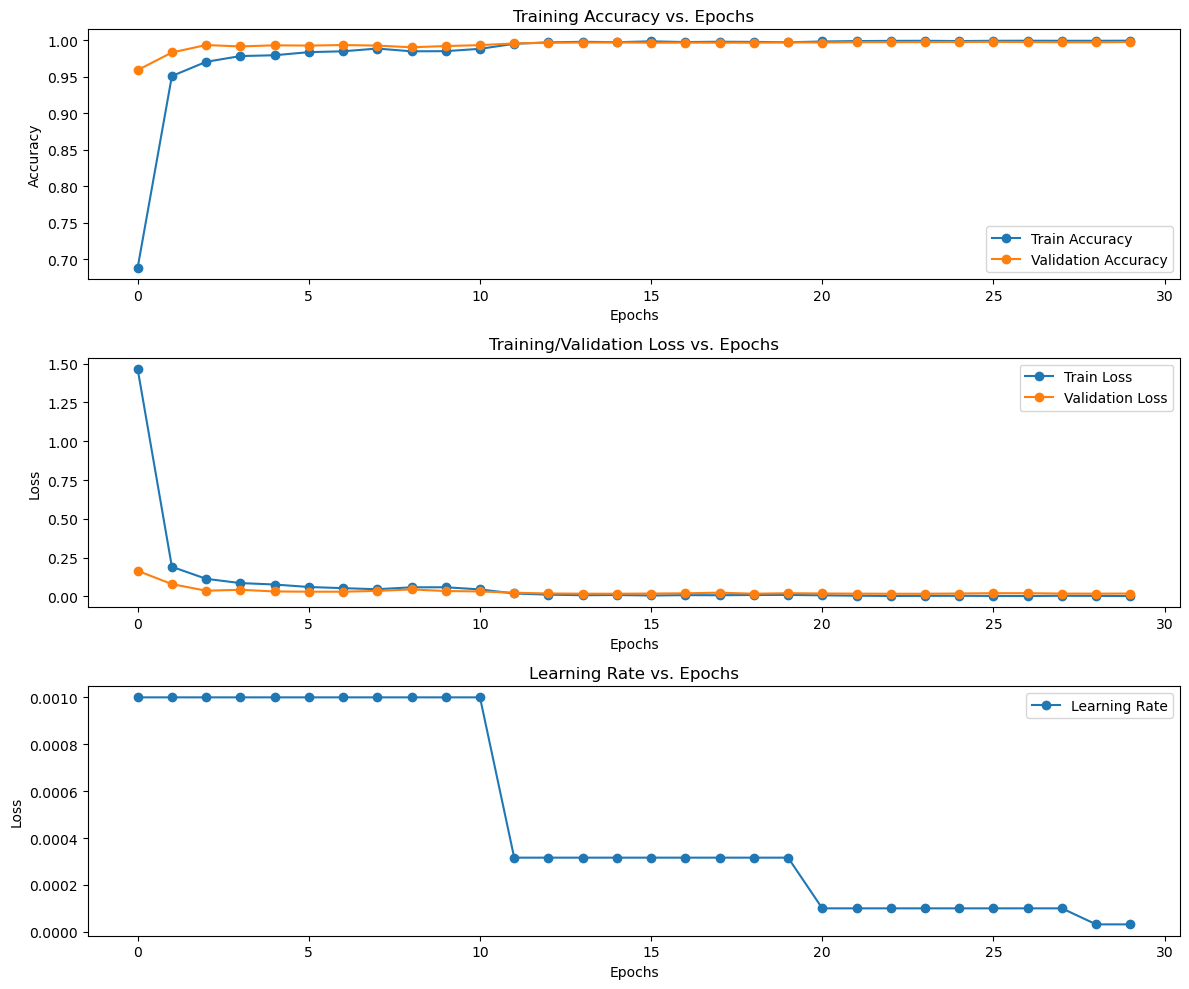

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [10]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score

# Importing the test dataset
y_test = pd.read_csv('TSR_Data/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('TSR_Data/'+img)
        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)

In [11]:
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.9809184481393508


In [12]:
# Saving the Model 
model.save('my_model.keras')

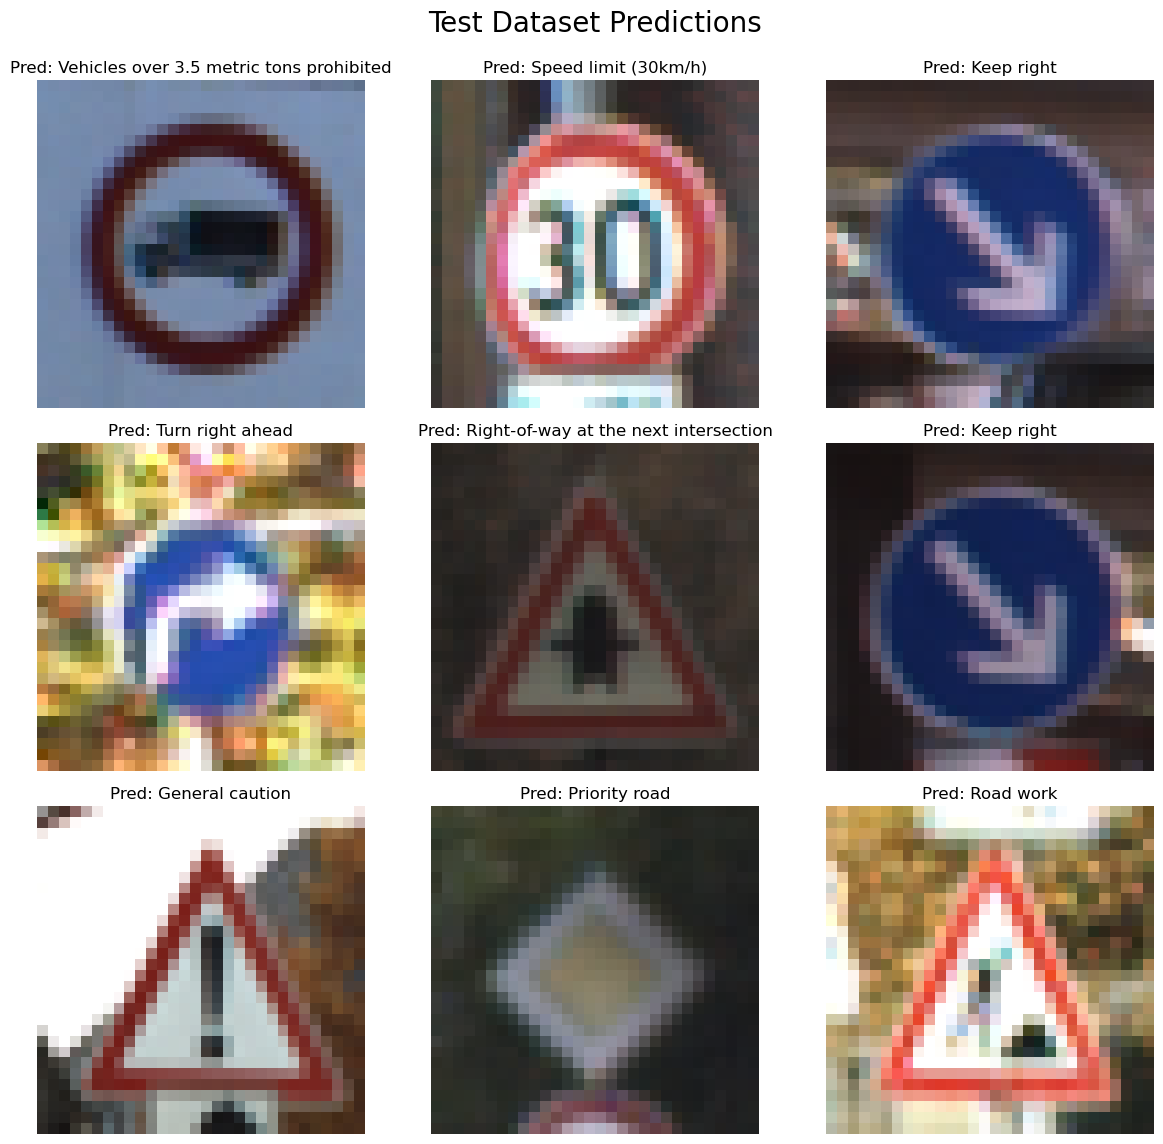

In [13]:
# Displaying the predictions
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
idx = 0

for i in range(3):
    for j in range(3):
        if idx < len(X_test):
            predicted_label = class_labels[pred[idx]]
            ax[i, j].set_title(f"Pred: {predicted_label}")
            ax[i, j].imshow(X_test[idx])
            ax[i, j].axis("off")
            idx += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

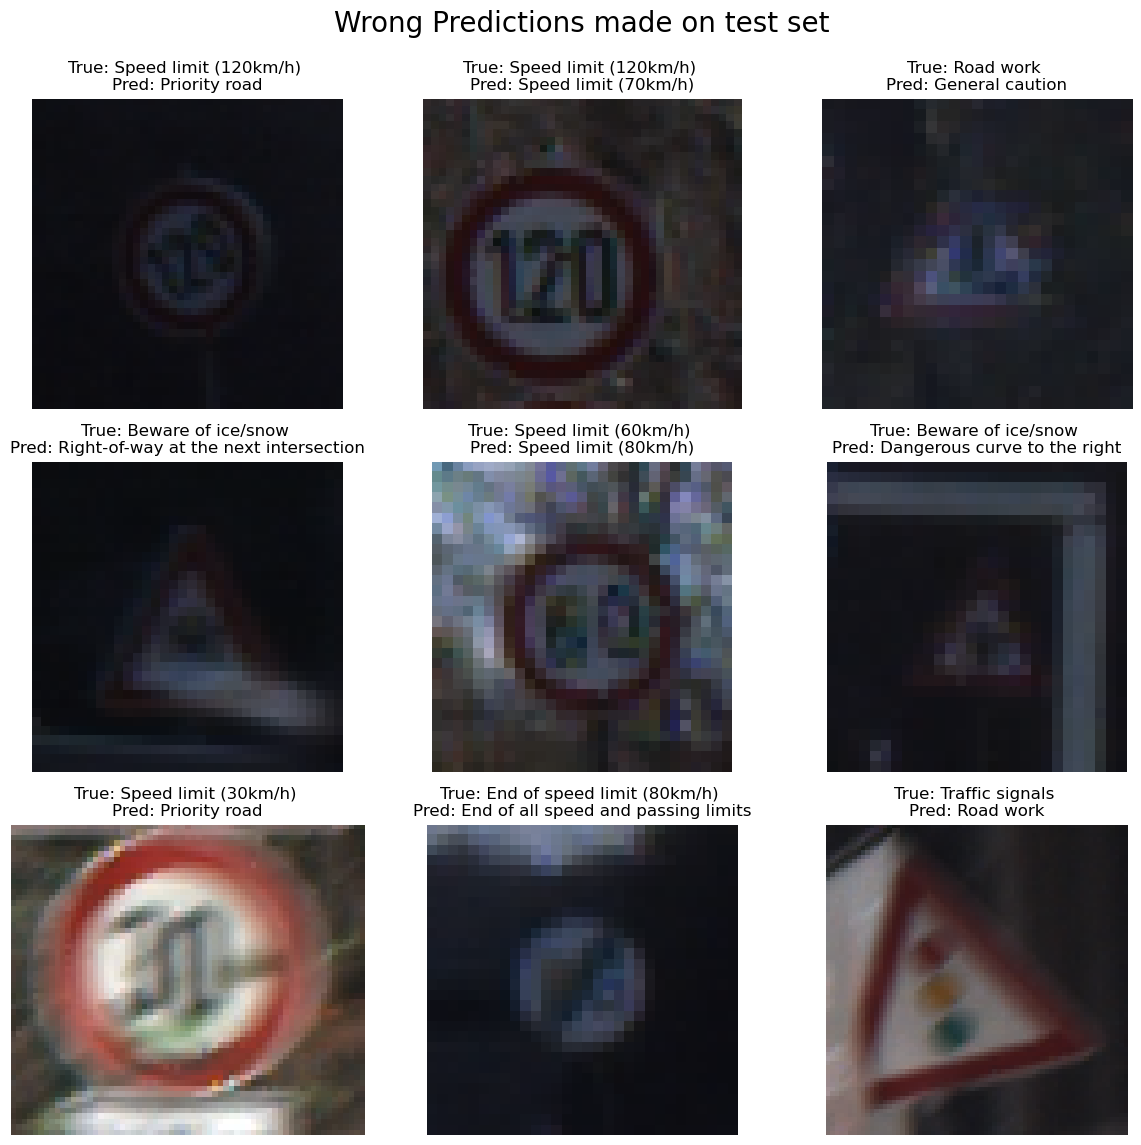

In [14]:
# Identify wrong predictions
errors = (labels != pred)
y_true_errors = labels[errors]
y_pred_errors = pred[errors]
test_img_errors = np.asarray(imgs)[errors]

# Display wrong predictions
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
idx = 0

for i in range(3):
    for j in range(3):
        if idx < len(test_img_errors):
            true_label = class_labels[y_true_errors[idx]]
            predicted_label = class_labels[y_pred_errors[idx]]
            ax[i, j].set_title(f"True: {true_label} \nPred: {predicted_label}")
            img_path = os.path.join('TSR_Data', test_img_errors[idx])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax[i, j].imshow(img)
            ax[i, j].axis("off")
            idx += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()